In [6]:
#Importação bibliotecas para a aula
import shap
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [8]:
#Carregamento da base de dados, X sendo o que vamos analisar e Y a classe 
data = load_breast_cancer()
X, y = data['data'], data['target']

In [9]:
#Separação base de dados de treinos e testes
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [10]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [11]:
clf.score(X_test, y_test)

0.9736842105263158

In [13]:
clf.predict([X_test[0]])

array([1])

In [14]:
#Inicializa o explicador SHAP
explainer = shap.KernelExplainer(clf.predict, shap.kmeans(X_train, 10))

In [15]:
#Calcula os valoes SHAP para o conjunto de dados de teste
shap_values = explainer.shap_values(X_test)

  0%|          | 0/114 [00:00<?, ?it/s]

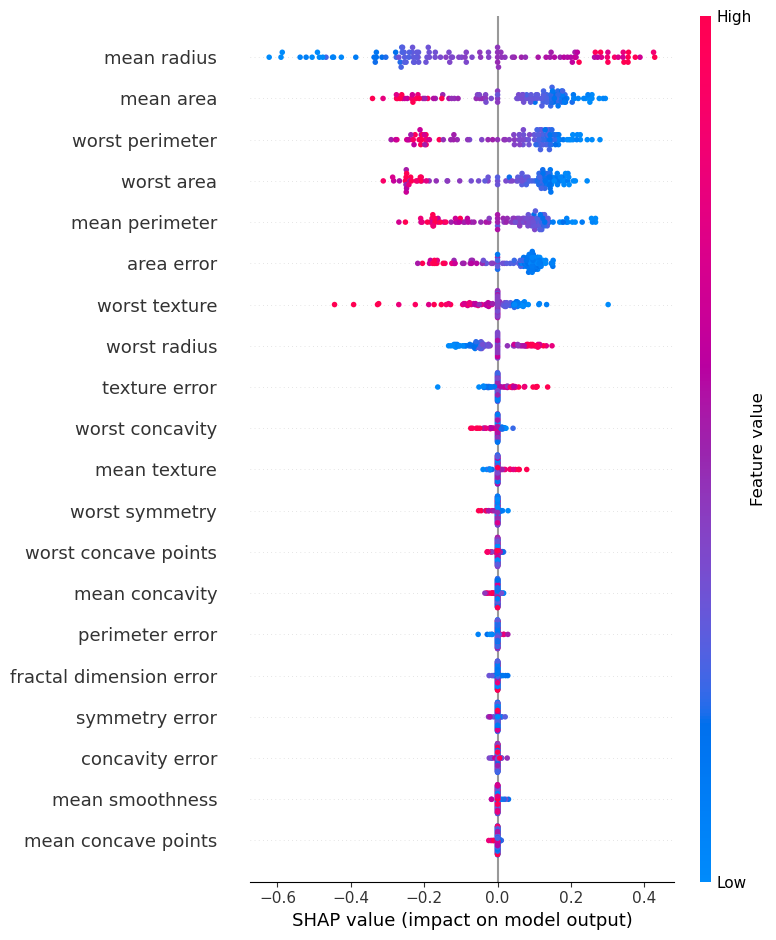

In [16]:
#Gera um gráfico de resumo dos valores SHAP
shap.summary_plot(shap_values, X_test, feature_names =data['feature_names'])

In [20]:
#Inicializa o javascript para visualização interativa
shap.initjs()
#De forma gráfica explica uma predição
shap.force_plot(explainer.expected_value, shap_values[0], X_test[0], feature_names=data['feature_names'])

In [21]:
#Pega a média dos valores SHAP absolutos
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

In [22]:
#Obtém a lista com os nomes das features
feature_names = data['feature_names']
#Combina as features com seus valores de importancia
feature_importance = zip(feature_names, mean_abs_shap_values)

In [24]:
#Ordena as features da mais importante para a menos
sorted_feature_importances = sorted(feature_importance, key = lambda x: x[1], reverse = True)

In [26]:
#Itera para printar a feature e sua importancia 
for feature, importance in sorted_feature_importances:
    print(feature, ':' , importance)

mean radius : 0.2385212830403976
mean area : 0.15288856237829831
worst perimeter : 0.1451090193756898
worst area : 0.1429667765062645
mean perimeter : 0.11586038327850459
area error : 0.0927918366747365
worst texture : 0.05993908417607291
worst radius : 0.0589371710735562
texture error : 0.01865192804546541
worst concavity : 0.008868481217665787
mean texture : 0.005431989243295626
worst symmetry : 0.002782675017669076
worst concave points : 0.002304005011268345
mean concavity : 0.002173240696036226
perimeter error : 0.0018146203900032943
fractal dimension error : 0.0013216580563893481
symmetry error : 0.001164909421455317
concavity error : 0.001164770831411015
mean smoothness : 0.001066143631589182
mean concave points : 0.0010528251562136463
mean symmetry : 0.001049788250140497
worst fractal dimension : 0.000901600867348404
concave points error : 0.000881968163150724
compactness error : 0.0008203645228805304
worst compactness : 0.0008197908169724615
smoothness error : 0.000695951704415